In [2]:
import pandas as pd
import matplotlib.pyplot as plt

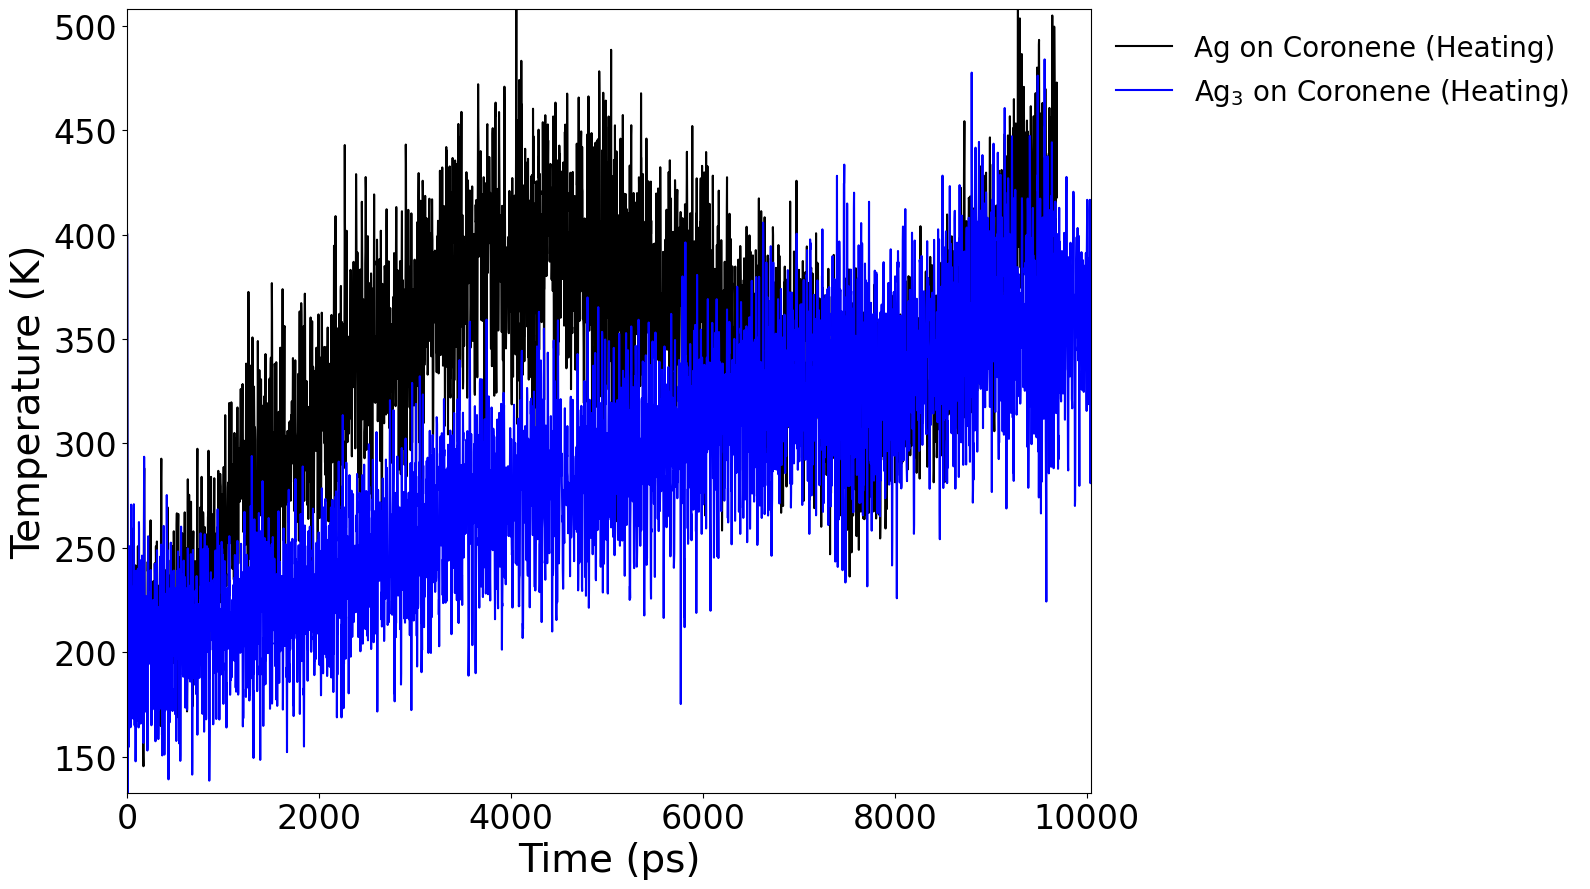

In [5]:
column_names = ["Step Nr.", "Time[fs]", "Kin.[a.u.]", "Temp[K]", "Pot.[a.u.]", "Cons Qty[a.u.]", "UsedTime[s]"] # Column names are per the .ener file, do not edit!
columns_to_plot = ["Step", "Time", "Kinetic Energy", "Temperature", "Potential Energy", "Cons Qty", "Time Used"] # Use these column names below

'''
Load in the dataframes here and do all the releveant modifications. Examples provided!
'''
df = pd.read_csv('CORONENE+AgAIMD-1.ener', skiprows=1, names=column_names, sep=r'\s+', on_bad_lines='skip') 
df2 = pd.read_csv('CORONENE_+_Ag_AIMD-1.ener', skiprows=1, names=column_names, sep=r'\s+', on_bad_lines='skip')

'''
Put together the information relevant for the plots, including:
Give the plot a title
Specify the labels for the x and y axes
In column_1 specify what the x-axis should be from columns_to_plot
In column_2 specify what the y-axis should be from columns_to_plot
Add all dataframes you want to plot in the dataframes list
'''
title_plot = ""
xlabel_plot = "Time (ps)"
ylabel_plot = "Temperature (K)"
labels_plot = ["Ag on Coronene (Heating)", "Ag$_3$ on Coronene (Heating)"]
column_1 = "Time"
column_2 = "Temperature"
colors = ["black", "blue"]
dataframes = [df, df2]
row_min = 0
row_max = min(df['Time[fs]'].iloc[-1], df2['Time[fs]'].iloc[-1]) # Finds the minimum last value for the time, to make sure the plots are equal in size because time steps might differ
'''
Specify the technical details for the plot such as the:
width
height
font size for the title, x and y labels, x and y ticks
turn on or off the legend frame and the inclusion of grids
Keep the font parameters 0 if you don't want to bother and use the default setup
'''
width = 16
height = 9
title_font = 0
xlabel_font = 0
ylabel_font = 0
xparam_font = 0
yparam_font = 0
legend_font = 0
legend_frame_on = False
grid_on = False

'''
In the event that the fonts are set to 0, the plotting will use the default values I set up, but adjust
it according to a scaling factor, which is the minimum of the specified width/default width and height/default height.
'''
scaling_factor = int(min(width/(16/2), height/(9/2)))
if title_font == 0:
    title_font = 16*scaling_factor
if xlabel_font == 0:
    xlabel_font = 14*scaling_factor
if ylabel_font == 0:
    ylabel_font = 14*scaling_factor
if xparam_font == 0:
    xparam_font = 12*scaling_factor
if yparam_font == 0:
    yparam_font = 12*scaling_factor
if legend_font == 0:
    legend_font = 10*scaling_factor

'''
Set up the plot, setting up its size, title, labels and ticks
'''
fig, ax = plt.subplots(figsize=(width, height))
ax.set_title(title_plot, fontsize=title_font)
ax.set_xlabel(xlabel_plot, fontsize=xlabel_font)
ax.set_ylabel(ylabel_plot, fontsize=ylabel_font)
ax.tick_params(axis='x', labelsize=xparam_font)  # X-axis tick labels size
ax.tick_params(axis='y', labelsize=yparam_font)  # Y-axis tick labels size

'''
Go through each dataframe and plot column_1 versus column_2
'''
for i in range(len(dataframes)):
    temp_df = dataframes[i].drop_duplicates(subset='Step Nr.', keep='last')
    column1 = column_names[columns_to_plot.index(column_1)] #Gets the correct column_1 name
    column2 = column_names[columns_to_plot.index(column_2)] #Gets the correct column_2 name
    df_subset = temp_df.loc[row_min: row_max, [column1, column2]] # Creates a dataframe subset, only based on the relevant rows and columns
    ax.plot(df_subset[column1], df_subset[column2], color=colors[i], linestyle='-', marker='', label=labels_plot[i]) #Sets up the plot using columns, plot colors, labels, etc.

    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=legend_font, frameon=legend_frame_on) # This specifies where the legends will be placed
    ax.margins(0)  # Set margins to zero to remove padding
    plt.tight_layout()  # Adjust subplots to reduce padding
    ax.grid(grid_on) # Adds or removes the grids
    
plt.show() # Display the plot when ready